In [89]:
import os

import torch
import torch.nn.functional as F
import torch.optim as optimizer

from GCN import GCN
from util import load_data, accuracy

In [90]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [91]:
# 参数配置
hidden = 32
lr = 0.01
weight_decay = 5e-4
idx_train = range(140)
idx_val = range(200, 500)
idx_test = range(500, 1500)
dropout = 0.5
# 数据集为cora或citeseer
dataset = 'cora'

In [92]:
"""
adj_matrix: 自邻接矩阵
features: 表征
labels: 标签
"""
adj_matrix, features, labels = load_data(dataset)

In [93]:
labels.max().item()

6

邻接矩阵 adj_matrix [N, N] [2708, 2708]

输入的特征矩阵 features(X) [N, C] [2708, 1433]

第一个卷积层 layer_1 [C, hidden] [1433, 32]

第二个卷积层 layer_2 [hidden, classes] [32, 7]

$$Z = A*softmax(A*Relu(A*X*W_0)*W_1)$$

In [94]:
model = GCN(
    features=features.shape[1],
    hidden=hidden,
    classes=labels.max().item() + 1,
    dropout=dropout
)

In [95]:
optimizer = optimizer.Adam(
    model.parameters(),
    lr=lr,
    weight_decay=weight_decay
)

In [96]:
if torch.cuda.is_available():
    model = model.cuda()
    features = features.cuda()
    adj_matrix = adj_matrix.cuda()
    labels = labels.cuda()

In [97]:
import matplotlib.pyplot as plt
loss_train_list = []
acc_train_list = []
loss_val_list = []
acc_val_list = []

In [98]:
def train(epoch):
    model.train()
    optimizer.zero_grad()
    output = model(features, adj_matrix)
    loss_train = F.nll_loss(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = F.nll_loss(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])
    print('Epoch: {:04d}'.format(epoch + 1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()))
    loss_train_list.append(loss_train.item())
    acc_train_list.append(acc_train.item())
    loss_val_list.append(loss_val.item())
    acc_val_list.append(acc_val.item())

In [99]:
def test():
    model.eval()
    output = model(features, adj_matrix)
    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))

In [100]:
for epoch in range(500):
    train(epoch)

Epoch: 0001 loss_train: 1.9448 acc_train: 0.1571 loss_val: 1.9379 acc_val: 0.1667
Epoch: 0002 loss_train: 1.6878 acc_train: 0.6214 loss_val: 1.7634 acc_val: 0.5167
Epoch: 0003 loss_train: 1.4655 acc_train: 0.6786 loss_val: 1.5967 acc_val: 0.5567
Epoch: 0004 loss_train: 1.2516 acc_train: 0.7429 loss_val: 1.4604 acc_val: 0.6267
Epoch: 0005 loss_train: 1.0161 acc_train: 0.8143 loss_val: 1.2790 acc_val: 0.6867
Epoch: 0006 loss_train: 0.8429 acc_train: 0.8500 loss_val: 1.1521 acc_val: 0.7300
Epoch: 0007 loss_train: 0.7148 acc_train: 0.9071 loss_val: 1.0195 acc_val: 0.7433
Epoch: 0008 loss_train: 0.5822 acc_train: 0.9071 loss_val: 0.9239 acc_val: 0.7833
Epoch: 0009 loss_train: 0.4686 acc_train: 0.9429 loss_val: 0.8499 acc_val: 0.8033
Epoch: 0010 loss_train: 0.3909 acc_train: 0.9714 loss_val: 0.7897 acc_val: 0.8033
Epoch: 0011 loss_train: 0.3381 acc_train: 0.9429 loss_val: 0.7157 acc_val: 0.8300
Epoch: 0012 loss_train: 0.2723 acc_train: 0.9643 loss_val: 0.7078 acc_val: 0.8100
Epoch: 0013 loss

Text(0.5, 1.0, 'loss_train')

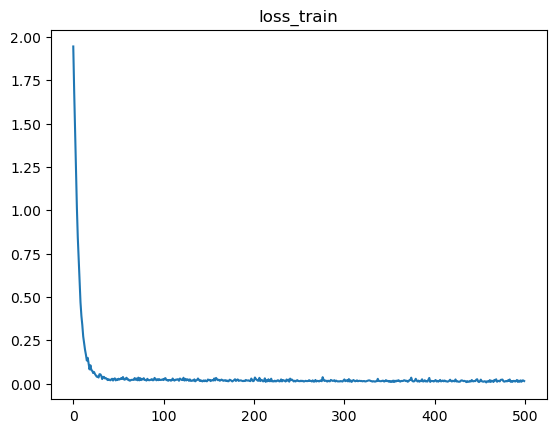

In [101]:
# 第一个位置
plt.plot(loss_train_list)
plt.title('loss_train')

Text(0.5, 1.0, 'acc_train')

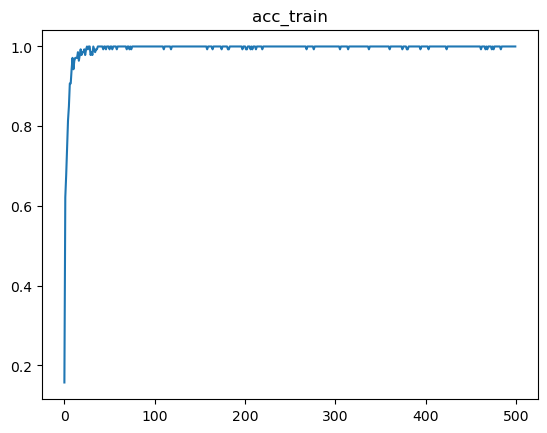

In [102]:
# 第二个位置
plt.plot(acc_train_list)
plt.title('acc_train')

Text(0.5, 1.0, 'loss_val')

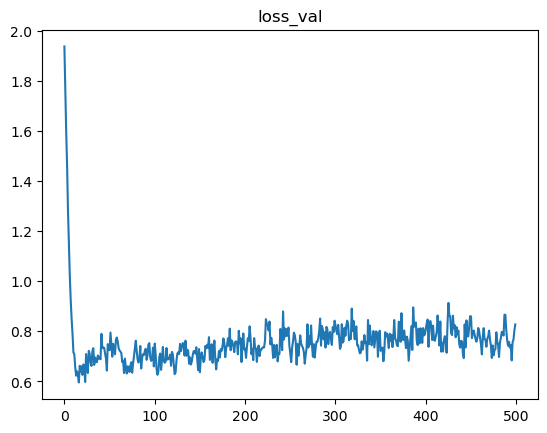

In [103]:
# 第三个位置
plt.plot(loss_val_list)
plt.title('loss_val')

Text(0.5, 1.0, 'acc_val')

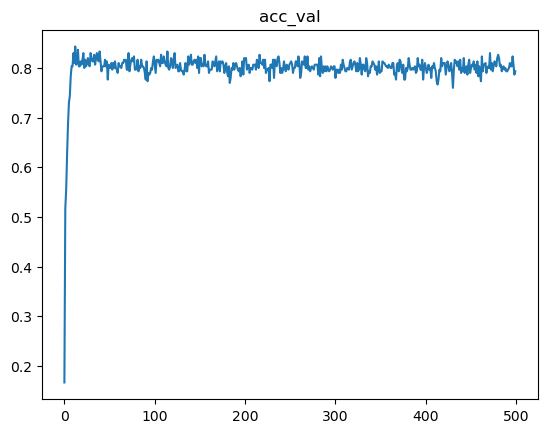

In [104]:
# 第四个位置
plt.plot(acc_val_list)
plt.title('acc_val')

In [105]:
test()

Test set results: loss= 0.6119 accuracy= 0.8130
